In [1]:
import pdb, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import sklearn.preprocessing as preprocessing
from itertools import product

In [2]:
from perceptron_model import Model
from grid_search import grid_search
from data_extract import extract_data

In [3]:
# Monk file 1

features, labels = extract_data(1, 'train')
features_test, labels_test = extract_data(1, 'test')
labels=labels.reshape((labels.shape[0],1))
labels_test=labels_test.reshape((labels_test.shape[0],1))

print(features.shape, labels.shape)

(124, 17) (124, 1)


In [4]:
# self.label_threshold = treshold
# self.new_epoch_notification = new_epoch_notification

default_parameters={
    'structure':[17,5,1],
    'seed':0,
    'activation':'sigm',
    'epochs':1000,
    'eta':0.4,
    'lamda':0.0,
    'loss':"MSE",
    'alpha':0.9,
    'initialization':'xav',
    'regression':False,
    'early_stopping':True,
    'tolerance':1e-3,
    'patience':20
}

parameter_grid_search={
    'structure':[[17,4,1], [17,16,1]],
    #'structure':[[17,4,1],[17,10,1],[17,16,1]],
    #'activation':['sigm', 'relu', 'tanh'],
    'activation':['sigm'],
    #'eta':[0.1, 0.2, 0.3, 0.5, 0.7],
    'eta':[0.1,0.2],
    'lamda':[0.001,0.01],
    'alpha':[0.2, 0.5],
    #'alpha':[0.2, 0.5, 0.7, 0.9],
    'initialization':['xav']
#     'epochs':[300, 500]
}

In [5]:
best_params=grid_search(default_parameters, parameter_grid_search, features, labels, validation_split=0.3, log=False, top_n=5)
#A = Model([3, 17, 5, 1], 0.005, 0.01, 0.01, 2000, 'sigm', 'xav', 3, 'MSE', 0.5, False, False, False, True)

In [6]:
best_params

[{'mean_training_loss': 0.021218703781806528,
  'mean_validation_loss': 0.10321753480784124,
  'params': {'activation': 'sigm',
   'alpha': 0.5,
   'eta': 0.1,
   'initialization': 'xav',
   'lamda': 0.001,
   'structure': [17, 16, 1]}},
 {'mean_training_loss': 0.02567225728993097,
  'mean_validation_loss': 0.1128785026003706,
  'params': {'activation': 'sigm',
   'alpha': 0.2,
   'eta': 0.1,
   'initialization': 'xav',
   'lamda': 0.001,
   'structure': [17, 16, 1]}},
 {'mean_training_loss': 0.027464495123255883,
  'mean_validation_loss': 0.11799738404259233,
  'params': {'activation': 'sigm',
   'alpha': 0.2,
   'epochs': 833,
   'eta': 0.2,
   'initialization': 'xav',
   'lamda': 0.001,
   'structure': [17, 16, 1]}},
 {'mean_training_loss': 0.03519258796162531,
  'mean_validation_loss': 0.12655257382587592,
  'params': {'activation': 'sigm',
   'alpha': 0.5,
   'epochs': 632,
   'eta': 0.1,
   'initialization': 'xav',
   'lamda': 0.01,
   'structure': [17, 16, 1]}},
 {'mean_training

In [7]:
best_param=best_params[0]['params']
default_parameters['early_stopping']=False
best_param, default_parameters

({'activation': 'sigm',
  'alpha': 0.5,
  'eta': 0.1,
  'initialization': 'xav',
  'lamda': 0.001,
  'structure': [17, 16, 1]},
 {'activation': 'sigm',
  'alpha': 0.9,
  'early_stopping': False,
  'epochs': 1000,
  'eta': 0.4,
  'initialization': 'xav',
  'lamda': 0.0,
  'loss': 'MSE',
  'patience': 20,
  'regression': False,
  'seed': 0,
  'structure': [17, 5, 1],
  'tolerance': 0.001})

In [8]:
y=Model(**default_parameters)
y.set_params(**best_param)
y.fit(features, labels)

[]


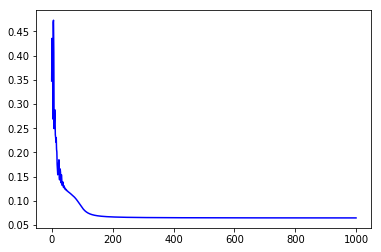

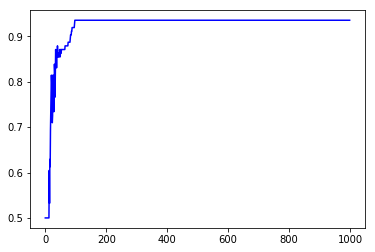

In [9]:
fig, ax = plt.subplots()
ax.plot(y.losses, c='b')
print(y.validation_losses)
ax.plot(y.validation_losses, c='r')
plt.show()
fig1, ax1 = plt.subplots()
ax1.plot(y.accuracies, c='b')
ax1.plot(y.validation_losses, c='r')
plt.show()